### Unsupervised learning and Preprocessing

Unsupervised learning subsumes all kind of machine learning where there is no known output, no teacher to instruct the learning algorithm.
i.e., in an unsupervised learning environment, the algorithm is just shown the input data and asked to extract knowledge from this data.

##### Unsupervised - Introduction

* Transformations of the dataset
    - Here a new representation of data which might be easier for humans or other ML algorithms to understand when compared to the original representation of data.
    - A common application is the `dimensionality reduction` which takes a high-dimensional data consisting of many features and finds a new way to represent with fewer features.
    - Most commonly, we reduce higher dimensions to 2D for better visualizations.
    - Another application is finding the parts or components that "make up" the data.
    - Example, topic extraction on collections of text document.

* Clustering 
    - Partitions the data into distinct groups of similar items.
    - A typical example is a social media account of a person.
    - This segregates all the available photos in the account and groups the picture based on its similarity.

* Challenges
    - A major challenge is whether an unsupervised ML model learned something useful while its journey.
    - As the name suggest, we don't know the exact output and hence we can't say the model "did well".
    - Because of this nature, these models are often used in exploratory setting, preprocessing setup for supervised learning algorithms.
    - Learning a new representation of the data can sometime lead to a better accuracy of the supervised algorithms or lesser memory and time consumption.
    - Even though preprocessing and scaling methods are often used in tandem with supervised models, scaling methods don't make use of supervised information, making them unsupervised.
    
* Preprocessing and Scaling
    - Earlier in Supervised models, we saw Neural Networks and SVMs (Support Vector Machine) are very sensitive to scaling of the data.
    - Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms.
    - Often this is a simple per-feature rescaling and shift of the data
    
Below is a simple example.
    

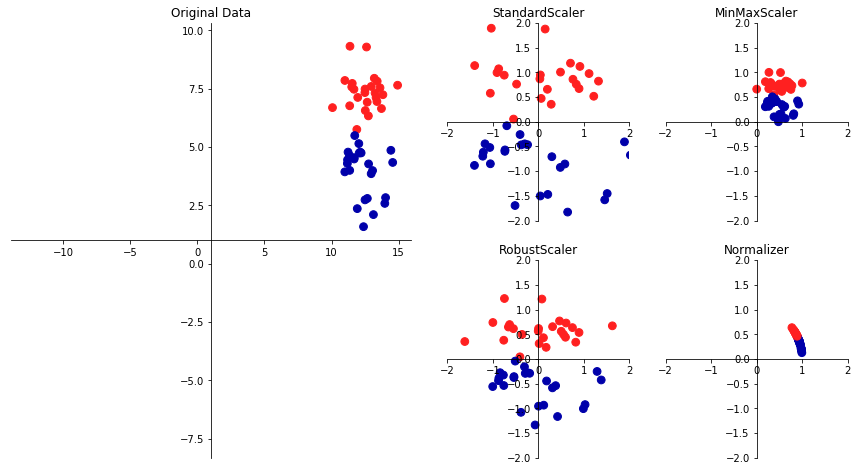

In [2]:
import mglearn
mglearn.plots.plot_scaling()

##### Different kinds of pre-processing

* The first plot above show a 2 class classification dataset with X-axis values ranging from 10 to 15 and 1 to 9 for Y-axis.
* The 4 plots on the right side shows 4 different ways to transform the data that yield more standard ranges.
* The `StandardScaler` in `scikit-learn` ensures that for each feature the _mean_ is 0 and _variance_ is 1, which brings all the features to the same magnitude.
* The `RobustScaler` works similar to the above scaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. But it uses the _median_ and _quartiles_ instead of mean and variance. This makes it to ignore data points that are very different from the rest (like measurement errors) or _*outliers*_ and can lead to trouble for other scaling techniques.
* The `MinMaxScaler`, shifts the data such that all the features are exactly between 0 and 1. 
* The `Normalizer` does a very different kind of scaling. It scales each data point such that the feature vector has a Eucliden length of 1. Or it projects a data point on the circle (or sphere in case of higher dimensions) with a radius of 1. This is used mostly when direction of the data point is important, not the length.

##### Applying Data Transformations

* We will use `cancer` dataset and then apply `SVC (Kernel SVM)` and use the `MinMaxScaler` for preprocessing the data.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state = 1)
print (X_train.shape)
print (X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


* Now, we will use the fit() method for this scaler with based only on X_train data and not y_train data.
* This fit() method will compute the minimum and maximum value of each feature on the training set.

**Later**

To apply the transformation to `scale` the training data, we use the `transform` method of scaler.

In [7]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
# transform data
X_train_scaled = scaler.transform(X_train)

#print dataset properties before and after scaling
print ("Transformed shape : {}".format(X_train_scaled.shape))
print ("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print ("per-feature minimum before scaling:\n{}".format(X_train.max(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(
    X_train_scaled.min(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(
    X_train_scaled.max(axis=0)))

Transformed shape : (426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature minimum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature minimum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


* Similarly for test dataset

In [9]:
X_test_scaled = scaler.transform(X_test)
print ("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print ("per-feature minimum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature minimum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


* As we can see from the above methods, the min and max are not 0 and 1. Some are even having values outside of 0 and 1.
* This is because the `MinMaxScaler` method always applies exactly the same transformation to training and test dataset.
* That means, the `transform` method always subtracts the train minimum and divides by the train range, which might be different for testing values.

##### Scaling Training and Test data in same way

* It is important to apply the same transformation to both the train and test dataset for supervised model to work on test set.
* The following example illustrates what would happen if we were to use the minimum and range of the test set instead:


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

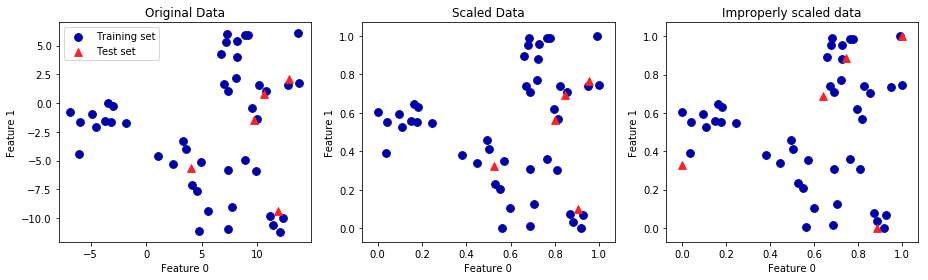

In [5]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

#splitting the train and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

#plot the train and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0],X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1),label="Test set", s=60)
axes[0].legend(loc = 'upper left')
axes[0].set_title("Original Data")

#scale the input data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Visualize the properly scaled data 
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

#rescale the test data set separately
# ==> so test set min is 0 and test set max is 1
## This is only for illustration purpose. DO NOT DO THIS!!

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)

X_test_scaled_badly = test_scaler.transform(X_test)

#visualie the wrongly scaled "test" data

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                c=mglearn.cm2(1), label= "test set", s=60)
axes[2].set_title("Improperly scaled data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()


From the above figure we could see,

* The figure 1,
    - Is an unscaled 2D dataset, with the training set shown as circles and test set shown as triangles.

* The second figure, 
    - Is the same as first one. 
    - Scaled using `MinMaxScaler` method for scaling.
    - We used both `fit` and `transform` method for obtaining this transformation.
    - We can see though this is same as figure 1, the axes are changed (scaled down and the values are between 0 and 1)
    - We could also see the Min and Max values of **test set** is not 0 and 1 respectively.

* The third figure,
    - This shows the reality when train and test sets are separately scaled.
    - Here, for both train and test set, the min and max values are between 0 and 1.
    - Hence, the dataset is not correct.

##### Shortcuts and Efficient Alternativeness

- Often, you want to fit a model on some dataset, and then transform it. 
- This is a very common task, which can often be computed more efficiently than by simply calling fit() and transform() method.
- So, all models that have a transform method also has a fit() method.
- An example of `StandardScaler` scaling method.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# via method chaining, regular way
X_scaled = scaler.fit(X_train).transform(X_train)

# same result, but more efficient way
X_scaled_d = scaler.fit_transform(X_train)


While `fit_transform` is not necessarily more efficient for all models, it is still good practice use this method when trying to transform the training set.

##### The Effect of Preprocessing and Supervised Learning

Now in the cancer dataset, the effect of `MinMaxScaler` on learning the SVC (quite different way of doing the same scaling we did earlier).
First, lets fit the SVC on the original data again for computation.

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100, gamma = 'auto')
svm.fit(X_train, y_train)

print ("Support Vector Machine Accuracy : {:.2f}".format(svm.score(X_test, y_test)))

Support Vector Machine Accuracy : 0.63


Now, the same effect by `MinMaxScaler` scaling

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#learning on the SVM on the scaled trained data
svm.fit(X_train_scaled, y_train)

#scoring
print ("Score of the scaled test set : {:.2f}".format(svm.score(X_test_scaled, y_test)))


Score of the scaled test set : 0.97


Comparing the above accuracy scores,
- The effect of scaling the data is quite significant.
- Eventhough its not complicated math, it is a good practice to use the scaling mechanisms provided by `scikit-learn` instead of reimplementing them yourself.
- You can easily replace one preprocessing algorithm with another by changing the class you use.
- As all of the preprocessing classes have the same interface, consisting of fit and transform method.

In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning on SVM on the scaled training
svm.fit(X_train_scaled, y_train)

#scoring
print ("SVM Test accuracy : {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM Test accuracy : 0.96


Now as we have seen the effect of transformation on a simple data set for preprocessing, lets move on to more interesting transformations using unsupervised learning.

### Dimensionality Reduction, Feature Extraction and Manifold Learning

- We now know, transforming data using unsupervised learning can have many motivations.
- Mostly, they are 
    * visualization
    * compressing the data
    * finding a representation that is more informative for further processing.
- One of the simplest and most widely used algorithms for all of these is `Principal Component Analysis (PCA)`.
- The other two algorithms are,
    * Non-negative matrix factorization (NMF) --> Used for feature extraction
    * t-SNE --> This is commonly used for visualization using 2D scatter plots
    
#### Principal Component Analysis (PCA)
